In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn_pandas import DataFrameMapper, gen_features

In [81]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

### source: https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn

In [4]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

In [7]:
data = pd.read_csv(dataset_url, sep=';')

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.shape

(1599, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


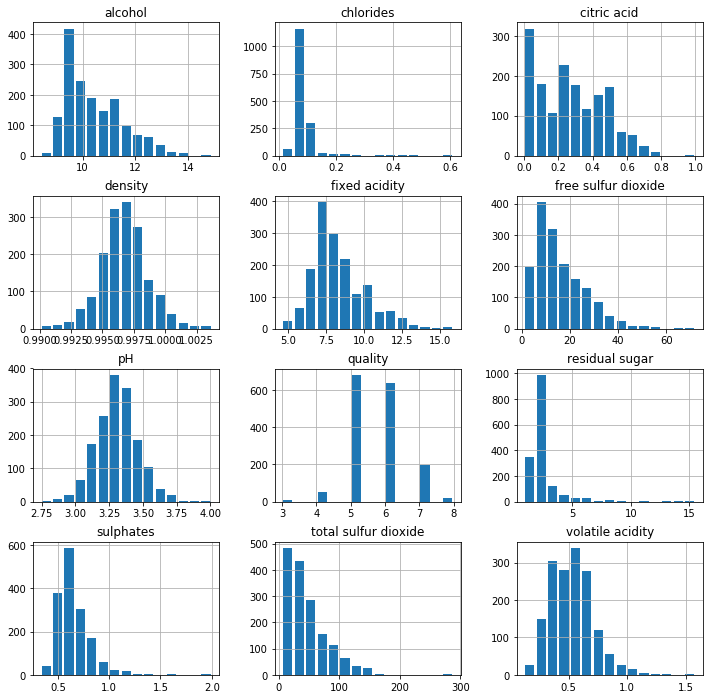

In [17]:
_ = data.hist(figsize=(12, 12), rwidth=.8, bins=15)

In [13]:
data.applymap(str).describe(include=['O']).T

,count,unique,top,freq
fixed acidity,1599,96,7.2,67
volatile acidity,1599,143,0.6,47
citric acid,1599,80,0.0,132
residual sugar,1599,91,2.0,156
chlorides,1599,153,0.08,66
free sulfur dioxide,1599,60,6.0,138
total sulfur dioxide,1599,144,28.0,43
density,1599,436,0.9972,36
pH,1599,89,3.3,57
sulphates,1599,96,0.6,69


In [15]:
data.quality.value_counts() / len(data)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

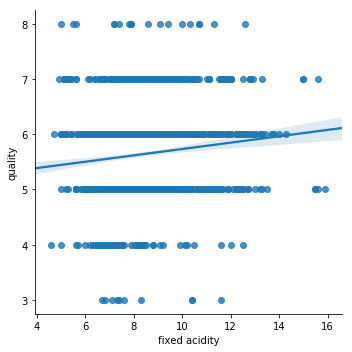

In [90]:
sns.lmplot(data=data, x='fixed acidity', y='quality')

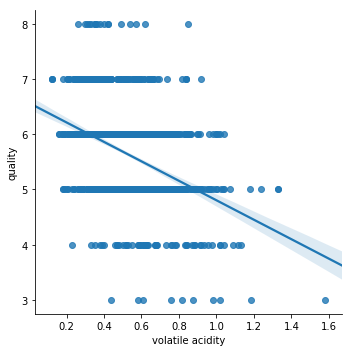

In [91]:
sns.lmplot(data=data, x='volatile acidity', y='quality')

In [89]:
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

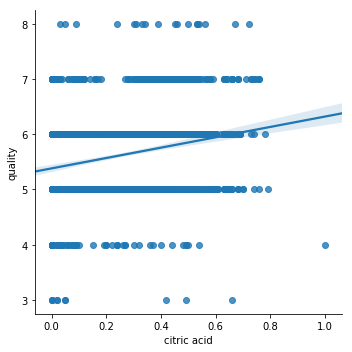

In [92]:
sns.lmplot(data=data, x= 'citric acid', y='quality')

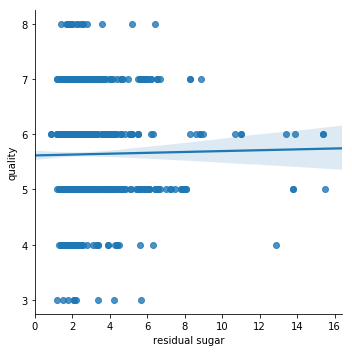

In [93]:
sns.lmplot(data=data, x=  'residual sugar', y='quality')

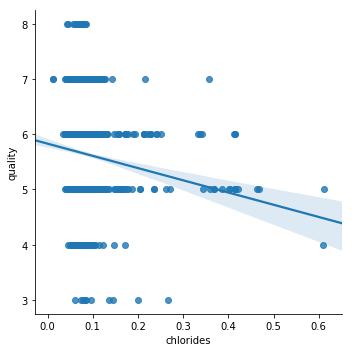

In [94]:
sns.lmplot(data=data, x= 'chlorides', y='quality')

In [34]:
X = data.drop('quality', axis=1).values
y = data['quality'].values

In [65]:
cv = StratifiedKFold(n_splits=10, random_state=123)

In [77]:
baseline_pipe = make_pipeline(StandardScaler(), LinearRegression())


linreg_scores = cross_val_score(baseline_pipe, X, y, cv=cv, scoring='r2')

print(linreg_scores.mean(), linreg_scores.std())

0.33485257527 0.0947242734412


In [78]:
rf_pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
rf_grid = GridSearchCV(rf_pipe, {#'randomforestregressor__max_depth': [9, 11, None], 
                                 'randomforestregressor__n_estimators': [100, 200, 300],
                                 }, cv=cv, scoring='r2')
rf_grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=False),
       error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [79]:
pd.DataFrame(rf_grid.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_randomforestregressor__n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.177248,0.020295,0.341575,0.931349,100,{'randomforestregressor__n_estimators': 100},3,0.274885,0.933427,0.366607,...,0.308841,0.931017,0.391367,0.932460,0.351745,0.929613,0.059724,0.003266,0.049717,0.001391
1,2.234058,0.034465,0.357026,0.932829,200,{'randomforestregressor__n_estimators': 200},1,0.310192,0.933754,0.423646,...,0.326375,0.932686,0.399287,0.932865,0.366806,0.931839,0.039775,0.002979,0.053490,0.000969
2,3.357439,0.048808,0.349728,0.933327,300,{'randomforestregressor__n_estimators': 300},2,0.283294,0.935103,0.394538,...,0.317548,0.934570,0.394775,0.933688,0.352098,0.930769,0.060390,0.001493,0.052298,0.001391


In [80]:
print(rf_grid.best_score_)
rf_grid.best_params_

0.357025708224


{'randomforestregressor__n_estimators': 200}

In [86]:
ridge_pipe = make_pipeline(StandardScaler(), Ridge())
ridge_grid = GridSearchCV(ridge_pipe, {'ridge__alpha': [50, 100, 200, 1000]}, cv=cv, scoring='r2')
ridge_grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=False),
       error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'ridge__alpha': [50, 100, 200, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [87]:
pd.DataFrame(ridge_grid.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_ridge__alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.003483,0.001141,0.336817,0.361457,50,{'ridge__alpha': 50},3,0.177924,0.378382,0.341839,...,0.299386,0.365986,0.395600,0.356019,0.335881,0.361466,0.001287,0.000950,0.092432,0.009930
1,0.004345,0.000892,0.337530,0.360492,100,{'ridge__alpha': 100},1,0.183248,0.377348,0.339024,...,0.302183,0.364990,0.397641,0.354901,0.331555,0.360645,0.002540,0.000283,0.090553,0.009896
2,0.002001,0.000462,0.336966,0.357646,200,{'ridge__alpha': 200},2,0.190021,0.374494,0.333474,...,0.305273,0.362061,0.397688,0.351782,0.323931,0.358094,0.000298,0.000053,0.087438,0.009864
3,0.001970,0.000526,0.308562,0.322186,1000,{'ridge__alpha': 1000},4,0.197408,0.339063,0.294265,...,0.291869,0.325764,0.358729,0.315692,0.278828,0.323987,0.000226,0.000179,0.070561,0.009690


In [88]:
print(ridge_grid.best_score_)
print(ridge_grid.best_estimator_)

0.33752970382
Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])


In [ ]:
# all numerical features
# imbalance target -> metric: r2
# outliers -> residual_sugar, total_sulfur_dioxide, free_sulfur_dioxide, chorides, sulphates
# non-normal dist. -> free_sulfur_dioxide, residual_sugar, chorides, sulphates
# scaling -> standardize